<h1><center><font color = purple> Cluster Anyalysis Of Global Devlopment Measurements

### <font color=red>Business Objective: 
    Creating clusters on global development measurement dataset

In [1]:
## importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline

## <font color=Magenta>Importing dataset

In [2]:
data_org = pd.read_excel('World_development_mesurement.xlsx')
data_org.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000"


In [3]:
## Creating copy of original dataset
data = data_org.copy()
data.head(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000"
5,0.042,NaN,301.0,Burundi,NaN,NaN,NaN,"$870,486,066",0.063,$7,...,47.0,0.0,1.0,0.490,0.481,0.029,6674286.0,0.082,"$1,400,000","$14,000,000"
6,0.041,NaN,3432.0,Cameroon,NaN,NaN,6310.0,"$9,287,367,569",0.044,$26,...,51.0,0.0,1.0,0.453,0.513,0.034,15927713.0,0.455,"$132,000,000","$241,000,000"
7,0.039,NaN,268.0,Central African Republic,NaN,NaN,NaN,"$914,500,332",0.043,$11,...,42.0,0.0,1.0,0.423,0.537,0.040,3638316.0,0.376,"$5,000,000","$33,000,000"
8,0.051,NaN,176.0,Chad,NaN,NaN,NaN,"$1,385,058,212",0.063,$10,...,46.0,0.0,1.0,0.490,0.482,0.028,8301151.0,0.216,"$14,000,000","$56,000,000"
9,0.039,NaN,84.0,Comoros,NaN,NaN,NaN,"$201,899,884",0.035,$13,...,56.0,NaN,1.0,0.415,0.554,0.031,528312.0,0.281,"$15,000,000",NaN


## <font color=Magenta> Data Cleaning and Prepration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

 - <font color = 'Blue'> There are 2704 rows in the data set</font>
 - <font color = 'Blue'> There are 25 columns in the data set provided</font>
 - <font color = 'Blue'> Columns are type of Object and float</font>

**Country column is categorical type we have to convert it into numerical type**

## <font color=magenta> Encoding
One hot encoding technique is useful when the categories are nominal or unordered. If the 'Country' column has a small number of unique categories, One-Hot Encoding can be an appropriate technique to use.


In [5]:
data['Country'].nunique()

208

<font color=blue>But here 'Country' column has a 208 number of unique categories.

## Here, we use label encoding

In [6]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
data['Country_encoded'] = le.fit_transform(data['Country'])

In [7]:
data['Country_encoded']=data['Country_encoded'].astype(float)

In [8]:
data.drop(['Country'],axis=1,inplace=True)

In [9]:
## Shape of data
data.shape

(2704, 25)

In [10]:
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
0,0.020,NaN,87931.0,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,NaN,...,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000",2.0
1,0.050,NaN,9542.0,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,NaN,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000",5.0
2,0.043,NaN,1617.0,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,NaN,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000",20.0
3,0.027,NaN,4276.0,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,NaN,...,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000",25.0
4,0.046,NaN,1041.0,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,NaN,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000",29.0


<font color = 'Brown'> Some columns has $ and % attached we will have to remove it.

In [10]:
## Remove $ from columns
data['GDP']=data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'], errors='coerce')

data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Inbound'] = pd.to_numeric(data['Tourism Inbound'], errors='coerce')

data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Outbound'] = pd.to_numeric(data['Tourism Outbound'], errors='coerce')

## Remove %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

- <font color=blue> All data type has same format

In [12]:
## check distribution for Numerical columns
data.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound,Country_encoded
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,1932.000000,1416.000000,...,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03,2704.00000
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09,103.50000
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,233.750350,273.299686,...,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10,60.05484
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05,0.00000
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,37.000000,156.000000,...,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08,51.75000
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,115.500000,239.000000,...,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08,103.50000
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,318.250000,344.750000,...,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09,155.25000
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11,207.00000


- <font color=blue> "Number of Records" have 0 standard deviation which means same values is present in each record.
- <font color=blue> There are outliers present in a few features like 'Days to Start Business', 'Hours to do Tax' as their max value is much higher compared to the 75th percentile value.

In [13]:
## Drop "Number of Records" column
data = data.drop(['Number of Records'],axis=1)

In [14]:
## Check Columns
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [15]:
## Rename columns
data = data.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')

In [16]:
## Check missing values
data.isnull().sum().sum()

12203

- <font color=blue> Total 12203 null values in whole dataset

In [17]:
## Check null values in dataset
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64

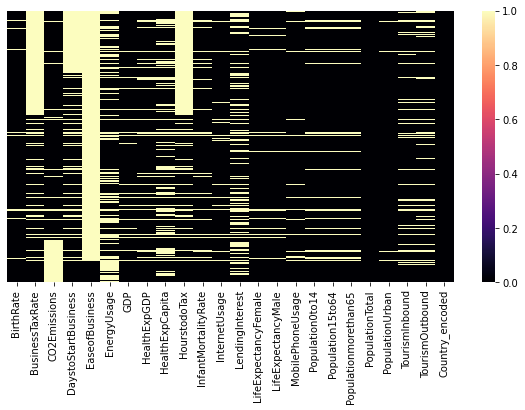

In [18]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

**We can see that,**
- <font color=blue> 'Ease of bussiness' contain large number of missing values
- <font color=blue> 'Population Urban' contain less number of missing values
- <font color=blue> There is no missing values in 'Country' and 'Population Total'

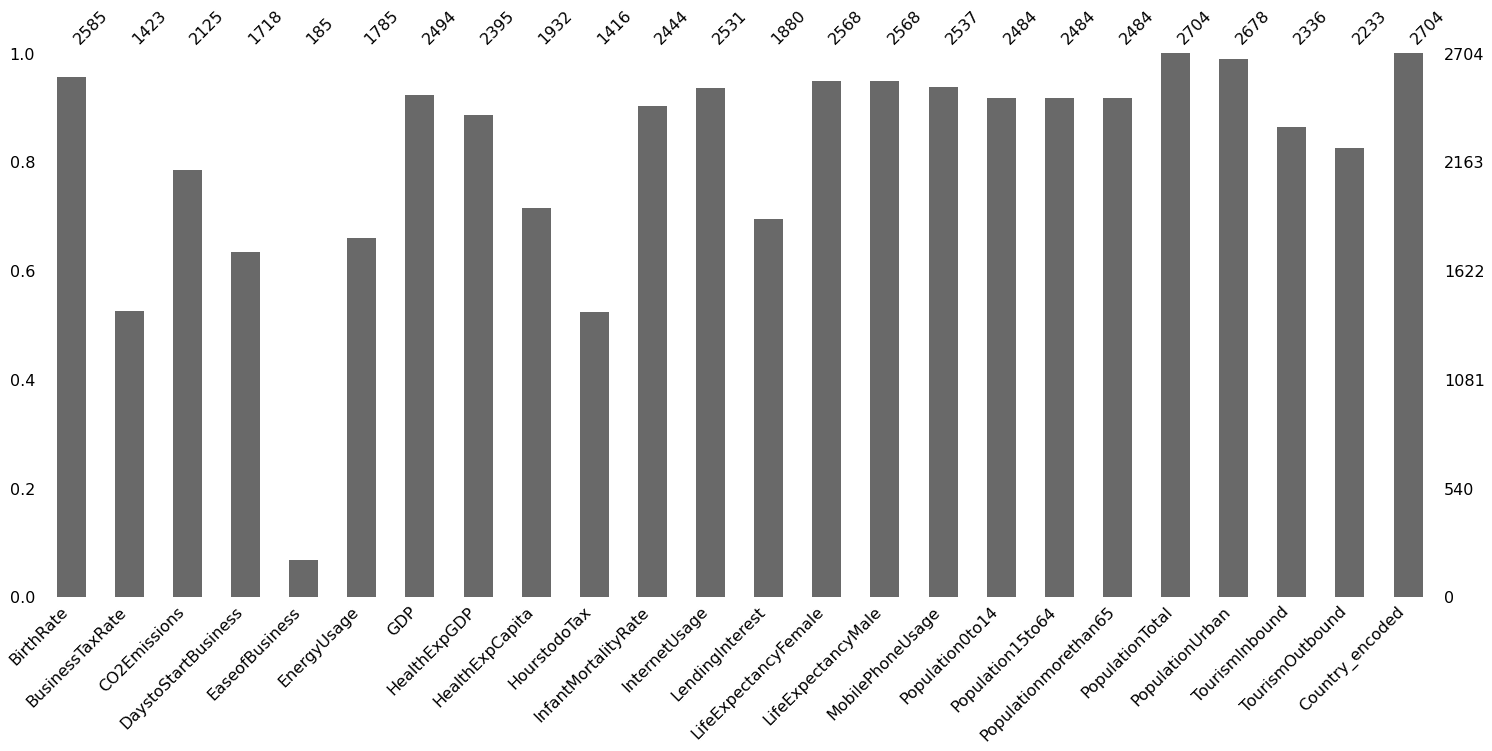

In [19]:
## visualize missing value for each artibute
import missingno as msno
msno.bar(data)
plt.show()

- <font color=brown> There are 26 null values in population urban column which is less than 1% values so droping those rows

In [20]:
## Remove rows having null values
data.dropna(subset=['PopulationUrban'],inplace=True)

## check null values
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1259
CO2Emissions             553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          746
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound           342
TourismOutbound          445
Country_encoded            0
dtype: int64

- <font color='blue'> There is no null values in Population Urban

<font color=brown>Now, we have to remove missing values of remaining columns.

**The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.**
- First we have to check distribution of all columns present in data.
- If distribution of data is normal we use mean for replace missing values.
- When the data is skewed, it is good to consider using the median value for
  replacing the missing values.

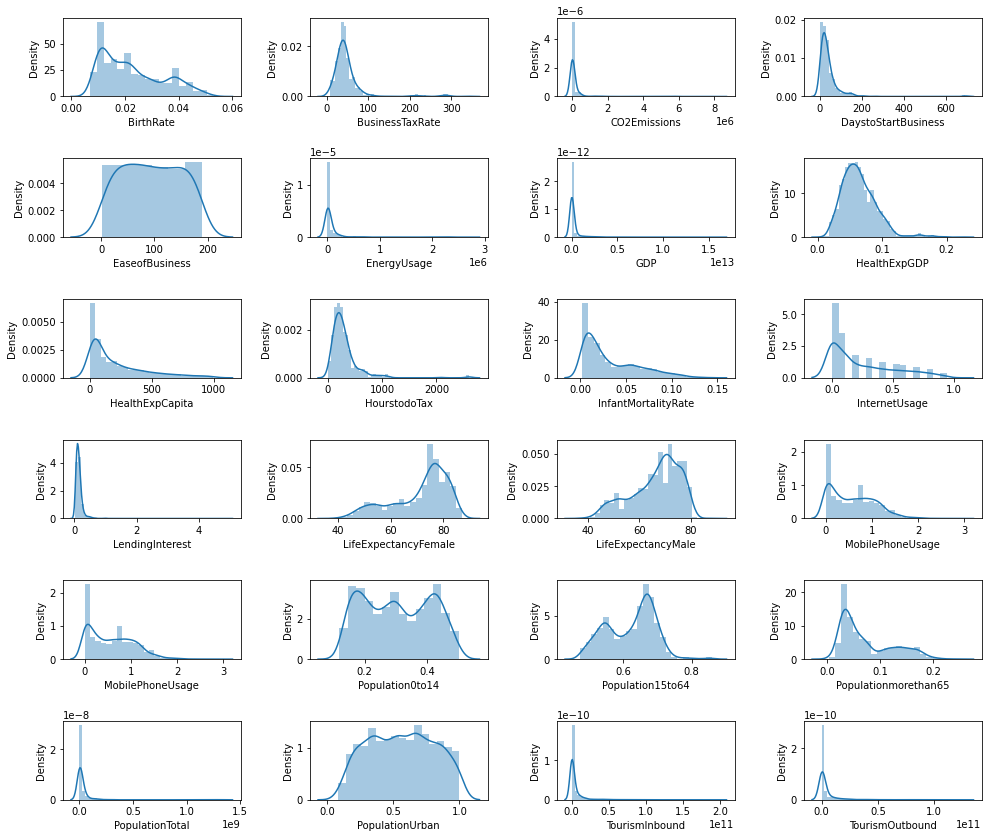

In [21]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])
sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

From above visvalization we can see that,
- <font color=blue>'BusinessTaxRate', 'EaseofBusiness', 'HealthExpGDP', 'HourstodoTax' and 'Population0to14' columns has normal distribution so we replace missing values by mean.
- <font color=blue>And for remaining columns with skewed data we replace missing values by median.

In [22]:
## Replace missing values by mean

data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness'] = data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP'] = data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax'] = data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14'] = data['Population0to14'].fillna(data['Population0to14'].mean())

## Replace missing values by median

data['BirthRate'] = data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions'] = data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']=data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate'] = data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage'] = data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale'] = data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale'] = data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage'] = data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64'] = data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65'] = data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())

In [23]:
## check missising values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

0 missing values present in whole data.


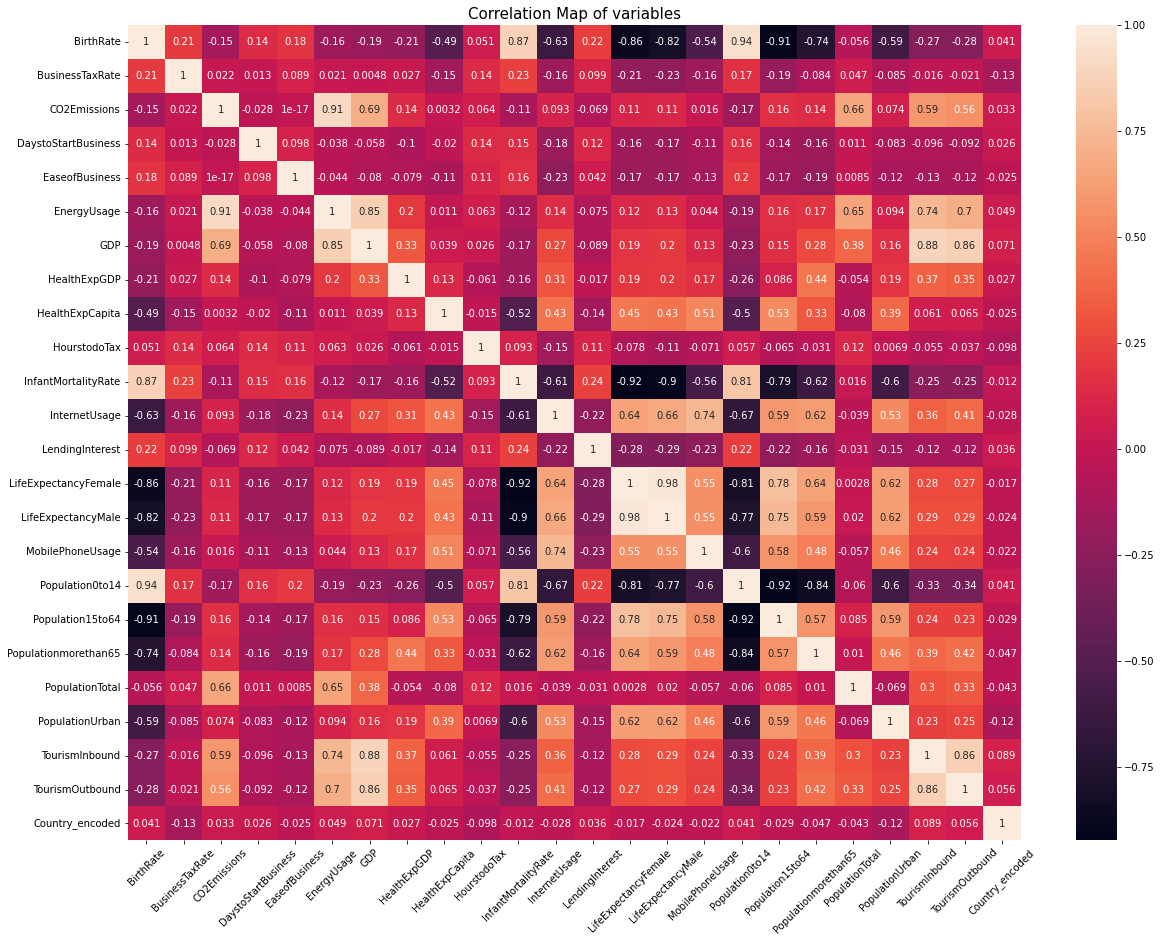

In [24]:
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

### Conclusion
- <font color=blue> 'Population 0 to 14' and 'Birth Rate' has strong relation.
- <font color=blue> 'Population 15 to 64' and 'Birth Rate' has weak relation.

In [25]:
## making copy of data
data1 = data.copy()    # For method 1
data2 = data.copy()    # For method 2
data3 = data.copy()    # For method 3

## <font color=Magenta>Outlier Detection

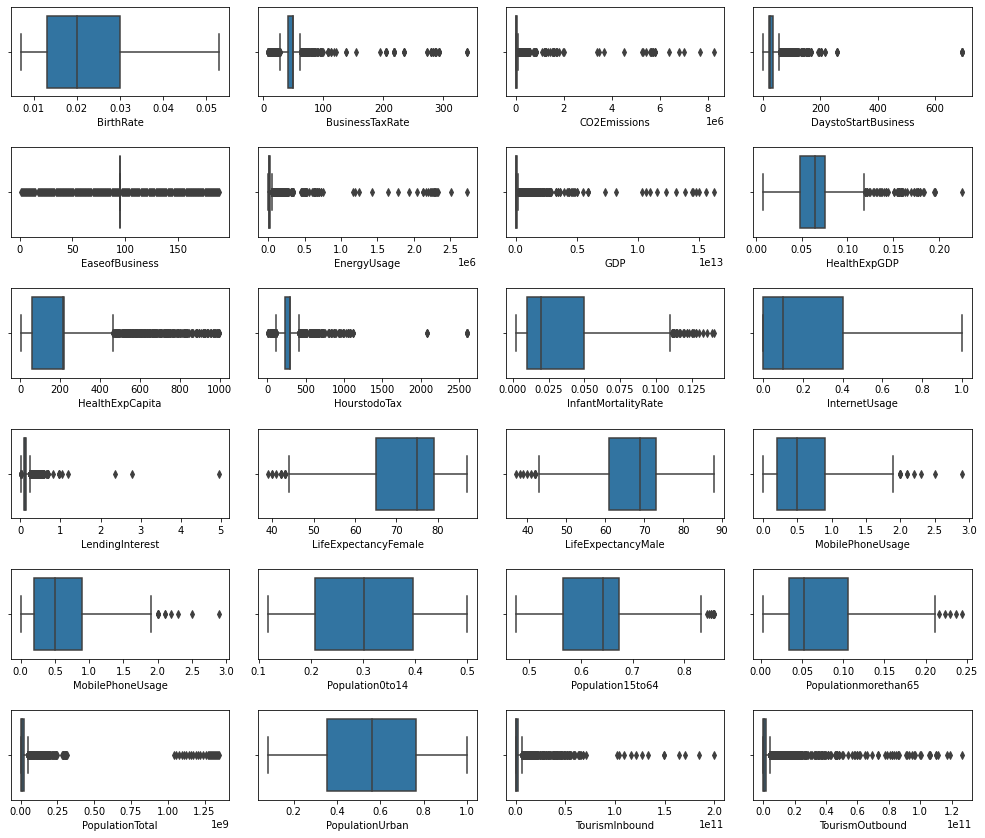

In [26]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3])
sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(data1.Population0to14,ax=axes[4,1])
sns.boxplot(data1.Population15to64,ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,3])
sns.boxplot(data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(data1.PopulationUrban,ax=axes[5,1])
sns.boxplot(data1.TourismInbound,ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

### Conclusion
- <font color=blue> Some columns like "Population Total", "Tourism in bound", "Tourism out bound" has large number of outlier present.
- <font color=blue> columns like "Population Urban", "Population 0 to 14" has less number of outliers.

# <font color='green'>Method 1

### Remove Outliers
here, we are removing outliers using inter quratile range method

In [27]:
## Outlier removal
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
data1.shape

(1038, 24)

By outlier removal we lost 60% of data.

## <font color='magenta'> Scaling</font>
   &nbsp;   Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
 
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

#### Here we will be using  Standard Scaler

In [29]:
## Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

### Apply PCA

In [30]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [31]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([8.80263184e+00, 2.93166999e+00, 1.88258907e+00, 1.22923438e+00,
       1.11158397e+00, 9.68177915e-01, 8.84572953e-01, 7.54272809e-01,
       6.86606730e-01, 6.19812318e-01, 5.82121321e-01, 4.82942967e-01,
       4.39530900e-01, 3.71017224e-01, 3.14063229e-01, 2.67903587e-01,
       2.35137280e-01, 1.79273215e-01, 1.30046963e-01, 8.47006744e-02,
       5.02070503e-02, 1.40302688e-02, 5.27142528e-05, 9.16099435e-33])

In [32]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.82354411e-01, 1.27341115e-01, 8.17728433e-02, 5.33934847e-02,
       4.82831774e-02, 4.20541383e-02, 3.84226419e-02, 3.27628761e-02,
       2.98237069e-02, 2.69223998e-02, 2.52852396e-02, 2.09772915e-02,
       1.90916287e-02, 1.61156430e-02, 1.36417680e-02, 1.16367605e-02,
       1.02135109e-02, 7.78697848e-03, 5.64876854e-03, 3.67909020e-03,
       2.18081223e-03, 6.09424007e-04, 2.28971602e-06, 3.97920379e-34])

In [33]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 38.24,  50.97,  59.15,  64.49,  69.32,  73.53,  77.37,  80.65,
        83.63,  86.32,  88.85,  90.95,  92.86,  94.47,  95.83,  96.99,
        98.01,  98.79,  99.35,  99.72,  99.94, 100.  , 100.  , 100.  ])

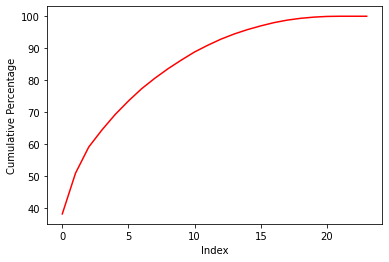

In [34]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [35]:
data_pca = pc_components[:,:15]

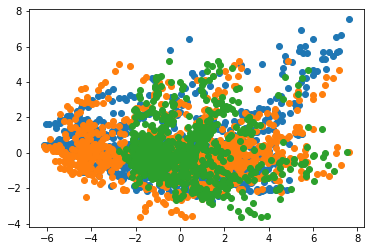

In [36]:
## Plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# <font color='magenta'> Model Building

**There are various types of clustring mostly used are :**
   - k-means clustring
   - Hierarchy clustring
   - DBSCAN clustring

## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

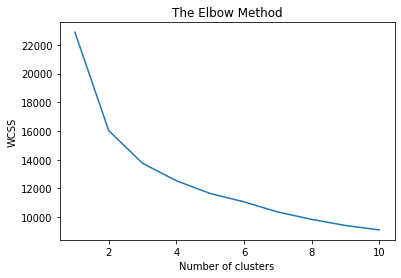

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
- 3 is the elbow point.
- We have to create three clusters

In [38]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

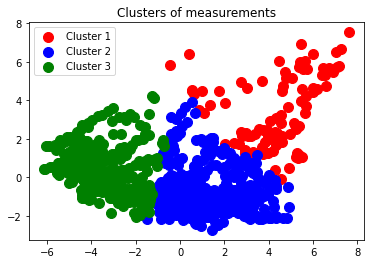

In [39]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

We get the three clusters of measurments.

In [40]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)

Silhouette Score for K-means clustring : 0.28128112023335605


## <font color='purple'> Hierarchy Clustring

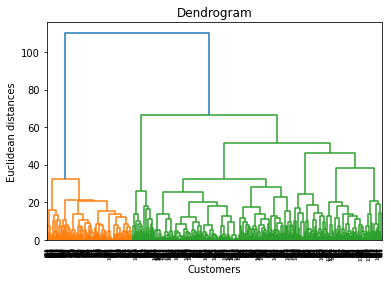

In [41]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [42]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

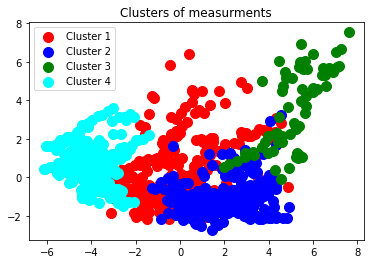

In [43]:
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [44]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.2081202665762478


## <font color='purple'> DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

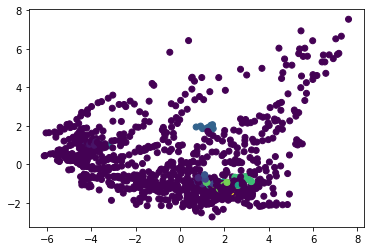

In [46]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels)
plt.show()

In [47]:
data1['cluster']=dbscan.labels_
data1.head()

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.035,60.0,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.043,15.0,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.047,152.0,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.051,12.0,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.063,7.0,302.461048,...,0.0,0.490,0.481,0.029,6674286.0,0.082,1400000.0,14000000.0,30.0,-1


In [48]:
# Use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342000,0.619,0.039,31719449.0,0.599,1.020000e+08,193000000.0,2.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454000,0.517,0.029,6949366.0,0.383,7.700000e+07,50000000.0,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383000,0.587,0.029,1755375.0,0.532,2.270000e+08,209000000.0,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468000,0.505,0.028,11607944.0,0.178,2.300000e+07,30000000.0,29.0,-1
5,0.042,49.051656,301.0,26.0,94.869565,14673.0,8.704861e+08,0.06300,7.000000,302.461048,...,0.0,0.490000,0.481,0.029,6674286.0,0.082,1.400000e+06,14000000.0,30.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,0.016,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,0.9,0.228000,0.673,0.099,258000.0,0.685,6.885000e+08,456000000.0,135.0,-1
2661,0.010,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,1.3,0.199000,0.690,0.110,102384.0,0.424,1.414000e+09,296000000.0,9.0,-1
2665,0.012,49.051656,8529.0,26.0,94.869565,14673.0,5.473536e+09,0.06417,214.627847,302.461048,...,1.4,0.303062,0.642,0.052,64798.0,1.000,4.610000e+08,411000000.0,21.0,-1
2669,0.013,49.051656,8529.0,26.0,94.869565,14673.0,1.549332e+10,0.06417,214.627847,302.461048,...,1.7,0.303062,0.642,0.052,57570.0,1.000,6.885000e+08,456000000.0,34.0,-1


In [49]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)

Silhouette Score for DBSCAN is: -0.24380431741484535


<font color=blue>DBSCAN is not most effective on this dataset

We get clustrers but, we used outlier removal data. Problem with that data is we have only 40% data left after removing outliers. Which means we loss more than 50% information from out dataset. So, we have to keep outliers. Now, create clusters with this data.

# <font color='green'> Method 2
**With ouliers**

In [50]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

### Apply PCA

In [51]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [52]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.52595664e-01, 1.66668623e-01, 6.12948589e-02, 5.33069518e-02,
       4.59935300e-02, 3.98740358e-02, 3.80856924e-02, 3.31573767e-02,
       3.28690286e-02, 3.23744527e-02, 2.94653611e-02, 2.47605986e-02,
       2.11842644e-02, 1.84471846e-02, 1.25144343e-02, 1.08721054e-02,
       8.89476326e-03, 5.34362958e-03, 4.34563896e-03, 3.55670903e-03,
       2.12578633e-03, 1.60464989e-03, 6.63127567e-04, 1.53314868e-06])

In [53]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 35.26,  51.93,  58.06,  63.39,  67.99,  71.98,  75.79,  79.11,
        82.4 ,  85.64,  88.59,  91.07,  93.19,  95.03,  96.28,  97.37,
        98.26,  98.79,  99.22,  99.58,  99.79,  99.95, 100.02, 100.02])

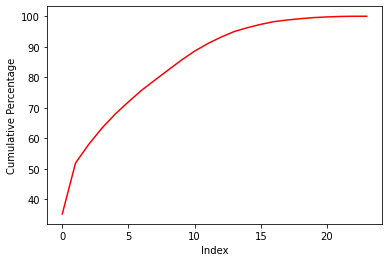

In [54]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [55]:
data_pca2 = pc_components[:,:15]

## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

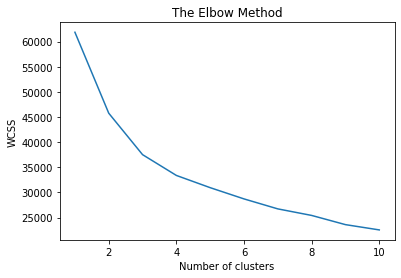

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
- 3 is the elbow point.
- We have to create three clusters

In [57]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

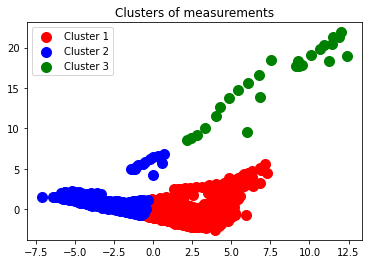

In [58]:
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [59]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

Silhouette Score for K-means clustring : 0.30609870945384676


## <font color='purple'> Hierarchy Clustring

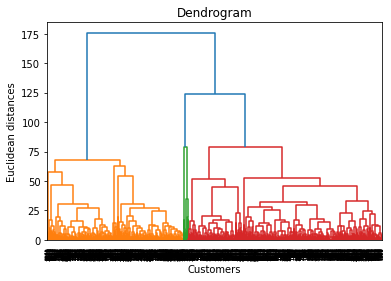

In [60]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [61]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca2)

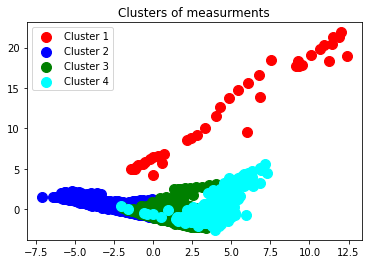

In [62]:
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_hc == 3, 0], data_pca2[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [63]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.1962303694757608


# <font color='purple'> DBSCAN

In [66]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca2)

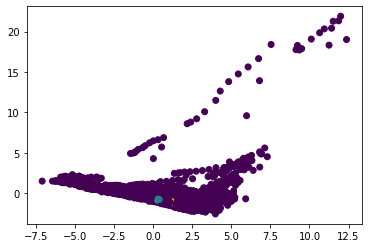

In [68]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [69]:
data2['cluster']=dbscan.labels_

In [71]:
data2[data2['cluster']==-1]

,BirthRate,BusinessTaxRate,CO2Emissions,DaystoStartBusiness,EaseofBusiness,EnergyUsage,GDP,HealthExpGDP,HealthExpCapita,HourstodoTax,...,MobilePhoneUsage,Population0to14,Population15to64,Populationmorethan65,PopulationTotal,PopulationUrban,TourismInbound,TourismOutbound,Country_encoded,cluster
0,0.020,49.051656,87931.0,26.0,94.869565,26998.0,5.479006e+10,0.03500,60.000000,302.461048,...,0.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,2.0,-1
1,0.050,49.051656,9542.0,26.0,94.869565,7499.0,9.129595e+09,0.03400,22.000000,302.461048,...,0.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,5.0,-1
2,0.043,49.051656,1617.0,26.0,94.869565,1983.0,2.359122e+09,0.04300,15.000000,302.461048,...,0.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,20.0,-1
3,0.027,49.051656,4276.0,26.0,94.869565,1836.0,5.788312e+09,0.04700,152.000000,302.461048,...,0.1,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,25.0,-1
4,0.046,49.051656,1041.0,26.0,94.869565,14673.0,2.610959e+09,0.05100,12.000000,302.461048,...,0.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,29.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,0.015,29.100000,8529.0,41.0,63.000000,14673.0,2.343634e+10,0.05400,972.000000,210.000000,...,1.4,0.207,0.705,0.088,1337439.0,0.088,6.885000e+08,4.560000e+08,189.0,-1
2700,0.013,46.400000,8529.0,5.0,4.000000,2132446.0,1.624460e+13,0.17900,214.627847,175.000000,...,1.0,0.196,0.667,0.136,313873685.0,0.811,2.000920e+11,1.265730e+11,198.0,-1
2701,0.015,41.900000,8529.0,7.0,85.000000,14673.0,5.000435e+10,0.08900,214.627847,310.000000,...,1.5,0.220,0.639,0.140,3395253.0,0.948,2.222000e+09,1.028000e+09,199.0,-1
2702,0.020,61.900000,8529.0,144.0,180.000000,14673.0,3.812862e+11,0.04600,593.000000,792.000000,...,1.0,0.288,0.652,0.060,29954782.0,0.889,9.040000e+08,3.202000e+09,202.0,-1


In [72]:
s2_dbscan = silhouette_score(data_pca2, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)

Silhouette Score for DBSCAN is: -0.4347932556380205


# <font color='green'>Method 3

## T-SNE

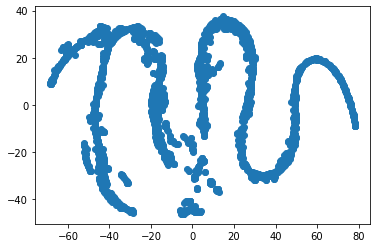

In [73]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data3)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

## <font color='purple'> K-means Clustring

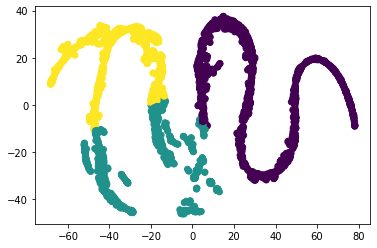

In [74]:
# Perform clustering with KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

# Plot the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=
           )
plt.show()

In [75]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)

Silhouette Score for K-means clustring : 0.41475078


## <font color='purple'> Hierarchy Clustring

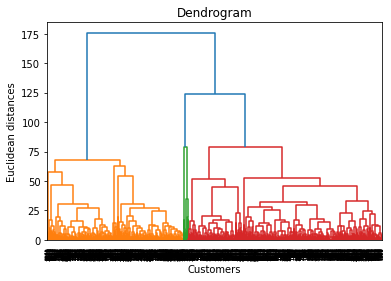

In [76]:
dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [77]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_tsne)

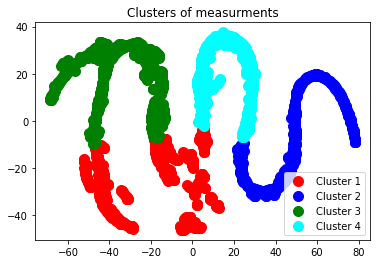

In [78]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [79]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.40877008


In [85]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy','M2 DBSCAN','M3 kmeans','M3 hierarchy'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy]})
df

,Method,Silhouette Score
0,M1 kmeans,0.281281
1,M1 hierarchy,0.208120
2,M1 DBSCAN,-0.243804
3,M2 kmeans,0.306099
4,M2 hierarchy,0.196230
5,M2 DBSCAN,-0.434793
6,M3 kmeans,0.414751
7,M3 hierarchy,0.408770


# <font color=Blue>Conclusion
- By comparing 'Silhouette Score' for each model we get most higest silhoutte score is 0.415 for method 3
- Which means applying t-sne for dimensionality reduction and then using K-means clustring for create clusters.
- This algorithm give us the best clusters compare to other clustring algorithms.

- <font color=blue>If data is in same clusters it means they have nearly same development measurement
- <font color=blue>If data is in different clusters it means belongs to different measurement
- <font color=blue>From this we can say which data has nearly same global development measurement or which is different from each others.